In [36]:
# Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

#Gridsearch


from sklearn import metrics

In [37]:
df_og = pd.read_csv('http://bit.ly/AutoMPGTrainDataset')
df_og

,displacement,horsepower,mpg
0,307.0,130,18.0
1,350.0,165,15.0
2,318.0,150,18.0
3,304.0,150,16.0
4,302.0,140,17.0
...,...,...,...
286,318.0,135,18.2
287,350.0,155,16.9
288,351.0,142,15.5
289,267.0,125,19.2


In [38]:
X = df_og[['displacement', 'horsepower']].values
y = df_og['mpg'].values

<AxesSubplot:xlabel='displacement', ylabel='horsepower'>

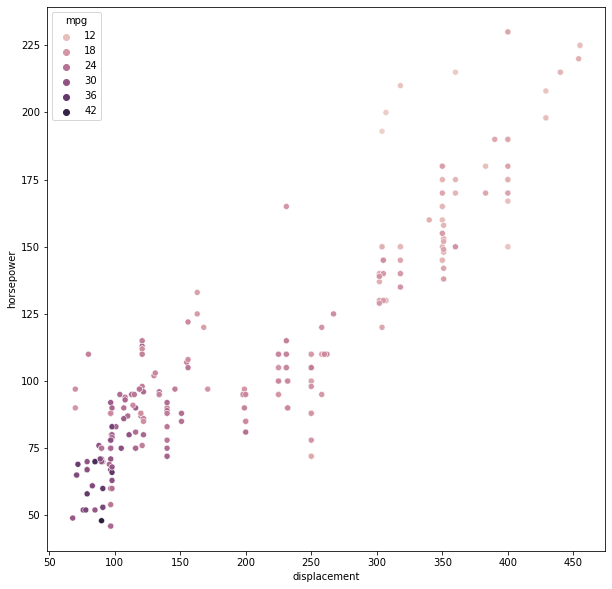

In [39]:
# Vizual on the variables we are working with
plt.figure(figsize=(10, 10))
sns.scatterplot(x='displacement', y='horsepower', data=df_og, hue='mpg')

In [40]:
# Model
knn = KNeighborsRegressor(n_neighbors=8)

knn.fit(X, y)

KNeighborsRegressor(n_neighbors=8)

In [41]:
# Load in our dataset to predict from

In [42]:
df_new = pd.read_csv('http://bit.ly/AutoMPGTestDataset')
df_new

,displacement,horsepower,mpg
0,89,71,31.9
1,86,65,34.1
2,98,80,35.7
3,121,80,27.4
4,183,77,25.4
...,...,...,...
96,140,86,27.0
97,97,52,44.0
98,135,84,32.0
99,120,79,28.0


In [43]:
X2 = df_new[['displacement', 'horsepower']].values
y2 = df_new['mpg'].values

In [44]:
y_pred = knn.predict(X2)

In [45]:
# test accuracy

np.sqrt(metrics.mean_absolute_error(y2, y_pred))

2.490948962277884

## Using Gridsearch to tune for us the best parameters

In [46]:
knn = KNeighborsClassifier()

In [52]:
# Define param grid
param_grid = {
    'n_neighbors' : range(1, 12, 1),
    'weights' : ['distance', 'uniform'],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}
print(param_grid)

{'n_neighbors': range(1, 12), 'weights': ['distance', 'uniform'], 'metric': ['euclidean', 'manhattan', 'minkowski']}


In [53]:
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, verbose=1, n_jobs=-1)
grid.fit(X, y)

Fitting 5 folds for each of 66 candidates, totalling 330 fits


/Users/RyanMburu/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


ValueError: Unknown label type: 'continuous'

In [ ]:
grid.best_score_

nan

In [ ]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])